# Get Planck MCMC parameter Covariance Matrices and Process into Fisher matrices

In [153]:
# load the data
planckDir = 'Planck_data/'

covmatFile1 = 'base_plikHM_EE_lowTEB.covmat'
paramNamesFile1 = 'base_plikHM_EE_lowTEB.paramnames'
covmatFile2 = 'base_plikHM_EE.covmat'
paramNamesFile2 = 'base_plikHM_EE.paramnames'
covmatFile3 = 'base_plikHM_TTTEEE_lowTEB.covmat'
paramNamesFile3 = 'base_plikHM_TTTEEE_lowTEB.paramnames'

# data from page:
# https://wiki.cosmos.esa.int/planckpla2015/index.php/Cosmological_Parameters
# http://pla.esac.esa.int/pla/#cosmology

covmat1 = np.loadtxt(planckDir+covmatFile1)
text_file = open(planckDir+paramNamesFile1, "r")
paramNames1 = text_file.readlines()
#print paramNames1
print len(paramNames1)
text_file.close()

covmat2 = np.loadtxt(planckDir+covmatFile2)
text_file = open(planckDir+paramNamesFile2, "r")
paramNames2 = text_file.readlines()
#print paramNames2
print len(paramNames2)
text_file.close()

covmat3 = np.loadtxt(planckDir+covmatFile3)
text_file = open(planckDir+paramNamesFile3, "r")
paramNames3 = text_file.readlines()
#print paramNames3
print len(paramNames3)
text_file.close()

for lineNum in range(13):
    print 'line ',lineNum,': ',paramNames1[lineNum], \
                  '        : ',paramNames2[lineNum], \
                  '        : ',paramNames2[lineNum]

59
57
82
line  0 :  omegabh2	\Omega_b h^2
        :  omegabh2	\Omega_b h^2
        :  omegabh2	\Omega_b h^2

line  1 :  omegach2	\Omega_c h^2
        :  omegach2	\Omega_c h^2
        :  omegach2	\Omega_c h^2

line  2 :  theta	100\theta_{MC}
        :  theta	100\theta_{MC}
        :  theta	100\theta_{MC}

line  3 :  tau	\tau
        :  tau	\tau
        :  tau	\tau

line  4 :  logA	{\rm{ln}}(10^{10} A_s)
        :  logA	{\rm{ln}}(10^{10} A_s)
        :  logA	{\rm{ln}}(10^{10} A_s)

line  5 :  ns	n_s
        :  ns	n_s
        :  ns	n_s

line  6 :  calPlanck	y_{\rm cal}
        :  galfEE100	A^{{\rm dust}EE}_{100}
        :  galfEE100	A^{{\rm dust}EE}_{100}

line  7 :  galfEE100	A^{{\rm dust}EE}_{100}
        :  galfEE100143	A^{{\rm dust}EE}_{100\times 143}
        :  galfEE100143	A^{{\rm dust}EE}_{100\times 143}

line  8 :  galfEE100143	A^{{\rm dust}EE}_{100\times 143}
        :  galfEE100217	A^{{\rm dust}EE}_{100\times 217}
        :  galfEE100217	A^{{\rm dust}EE}_{100\times 217}

line  9

In [154]:
# get indices of interest from the above output
print 'covmat1 shape: ', covmat1.shape
print 'covmat2 shape: ', covmat2.shape
print 'covmat3 shape: ', covmat3.shape

# covariance matrix is only 20x20.  If I use this then I'll have to use theta_mc instead of H0.
selectIndices = [0,1,2,4,5,3] # used later to put them in order compatible with my Fij
print 'covmat1: ',[paramNames1[si] for si in selectIndices]
print 'covmat2: ',[paramNames2[si] for si in selectIndices]
print 'covmat3: ',[paramNames3[si] for si in selectIndices]



covmat1 shape:  (13, 13)
covmat2 shape:  (13, 13)
covmat3 shape:  (33, 33)
covmat1:  ['omegabh2\t\\Omega_b h^2\n', 'omegach2\t\\Omega_c h^2\n', 'theta\t100\\theta_{MC}\n', 'logA\t{\\rm{ln}}(10^{10} A_s)\n', 'ns\tn_s\n', 'tau\t\\tau\n']
covmat2:  ['omegabh2\t\\Omega_b h^2\n', 'omegach2\t\\Omega_c h^2\n', 'theta\t100\\theta_{MC}\n', 'logA\t{\\rm{ln}}(10^{10} A_s)\n', 'ns\tn_s\n', 'tau\t\\tau\n']
covmat3:  ['omegabh2\t\\Omega_b h^2\n', 'omegach2\t\\Omega_c h^2\n', 'theta\t100\\theta_{MC}\n', 'logA\t{\\rm{ln}}(10^{10} A_s)\n', 'ns\tn_s\n', 'tau\t\\tau\n']


In [155]:
# fix the nuissance parameters

# invert covariance matrices
invCov1 = np.linalg.inv(covmat1)
invCov2 = np.linalg.inv(covmat2)
invCov3 = np.linalg.inv(covmat3)

# print shapes and diagonals
print invCov1.shape
print invCov2.shape
print invCov3.shape
print np.array([invCov1[si,si] for si in selectIndices])
print np.array([invCov2[si,si] for si in selectIndices])
print np.array([invCov3[si,si] for si in selectIndices])

#subInvCov = [invCov[si1][si2] for si1 in selectIndices for si2 in selectIndices]
#subInvCov = [[invCov[:,si1] for si1 in selectIndices[si2]] for si2 in selectIndices]
#subInvCov1 = [invCov[si1] for si1 in selectIndices]
#print subInvCov1
#subInvCov = [subInvCov1[:,si2] for si2 in selectIndices]

nParams = selectIndices.__len__()
subInvCov1 = np.empty((nParams,nParams))
subInvCov2 = np.empty((nParams,nParams))
subInvCov3 = np.empty((nParams,nParams))
# pull out the parameters indicated in selectIndices in order indicated there
for si1 in range(6):
    for si2 in range(6):
        subInvCov1[si1,si2] = invCov1[selectIndices[si1],selectIndices[si2]]
        subInvCov2[si1,si2] = invCov2[selectIndices[si1],selectIndices[si2]]
        subInvCov3[si1,si2] = invCov3[selectIndices[si1],selectIndices[si2]]
#print subInvCov
print np.diag(subInvCov1)
print np.diag(subInvCov2)
print np.diag(subInvCov3)

(13, 13)
(13, 13)
(33, 33)
[14392681.1929545   1049528.32399962  1437035.41942155    46769.37259216
    15165.26890736   189447.056113  ]
[1.43899404e+07 1.08746731e+06 1.38833734e+06 4.72009326e+04
 1.22552384e+04 1.90637457e+05]
[93644638.67707175  4268555.25616327 14958494.88509028   804119.32282487
   369396.33712423  3204935.51385855]
[14392681.1929545   1049528.32399962  1437035.41942155    46769.37259216
    15165.26890736   189447.056113  ]
[1.43899404e+07 1.08746731e+06 1.38833734e+06 4.72009326e+04
 1.22552384e+04 1.90637457e+05]
[93644638.67707175  4268555.25616327 14958494.88509028   804119.32282487
   369396.33712423  3204935.51385855]


In [156]:
# get desired combinations before finding sigmas
"""
covmatFile1 = 'base_plikHM_EE_lowTEB.covmat'
paramNamesFile1 = 'base_plikHM_EE_lowTEB.paramnames'
covmatFile2 = 'base_plikHM_EE.covmat'
paramNamesFile2 = 'base_plikHM_EE.paramnames'
covmatFile3 = 'base_plikHM_TTTEEE_lowTEB.covmat'
paramNamesFile3 = 'base_plikHM_TTTEEE_lowTEB.paramnames'
"""
Fij_plikHM_EE_lowTEB = subInvCov1
Fij_plikHM_EE = subInvCov2
Fij_plikHM_TTTEEE_lowTEB = subInvCov3

Fij_plikHM_lowTEB = Fij_plikHM_EE_lowTEB - Fij_plikHM_EE

In [157]:
# re-invert and get sigmas
getSigmas = lambda Fij: np.sqrt(np.diag(np.linalg.inv(Fij)))
sigmas_TTTEEE_lowTEB = getSigmas(Fij_plikHM_TTTEEE_lowTEB)
sigmas_lowTEB = getSigmas(Fij_plikHM_lowTEB)
print sigmas_TTTEEE_lowTEB
print sigmas_lowTEB

[0.00013805 0.00139624 0.00032041 0.03085309 0.00389213 0.01601033]
[0.00315051 0.00444641 0.00440098 0.01898294 0.01669401 0.02325072]


In [158]:
# save that sub-Fisher matrix to use in another notebook
# I will want it in "Rebuild covar with noise"
#np.savetxt('PlanckInvCovFromMCMC.txt',subInvCov)
np.savetxt('Planck_TTTEEE_lowTEB_FromMCMC.txt',Fij_plikHM_TTTEEE_lowTEB)
np.savetxt('Planck_lowTEB_FromMCMC.txt',Fij_plikHM_lowTEB)

# Transform to H0 parameter via Jacobian

In [159]:
# can I get a jacobian to translate theta_mc to H0?
# yes.  Use discrete derivative with CAMB.  
# dtheta/dparams vector below from notebook "Rebuild covar with noise"

In [160]:
# first need to convert 100*theta_MC to theta_MC
mcIndex = 2
mcFac = 100
Fij_plikHM_TTTEEE_lowTEB[:,mcIndex] *= mcFac
Fij_plikHM_TTTEEE_lowTEB[mcIndex,:] *= mcFac
Fij_plikHM_lowTEB[:,mcIndex] *= mcFac
Fij_plikHM_lowTEB[mcIndex,:] *= mcFac

In [161]:
#dtheta/dparams
nCosParams = 6
# paramList after transforming to (H0, 10^9 As) from (cosmomc_theta, ln(10^10*As) )
paramList = ['ombh2','omch2','H0','10^9 As','ns','tau'] 
dthetas = [-0.024833399132992862, 0.010457065703734872, 2.9621955038288544e-05, 0.0, 0.0, 0.0]

# The only derivatives in the Jacobian are on the dtheta/dparam row.
mcIndex = 2
jacobian = np.diag(np.ones(nCosParams))
jacobian[mcIndex,:] = dthetas#*100
#jacobian[:,mcIndex] = dthetas#*100

# multiply these all by d{100thetamc}/d{thetamc} = 100
jacobian[mcIndex,:] *= 100
#jacobian[:,mcIndex] *= 100

print jacobian

[[ 1.          0.          0.          0.          0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.        ]
 [-2.48333991  1.04570657  0.0029622   0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]]


In [162]:
# jacobian-it-up
Fij_plikHM_TTTEEE_lowTEB = np.dot(jacobian.T,np.dot(Fij_plikHM_TTTEEE_lowTEB,jacobian))
Fij_plikHM_lowTEB = np.dot(jacobian.T,np.dot(Fij_plikHM_lowTEB,jacobian))

#print Fij_plikHM_TTTEEE_lowTEB
#print Fij_plikHM_lowTEB

# Transform to $10^9 As$ via Jacobian

In [163]:
# only one partial derivative needed
# d( ln(10^10*As)) / d(10^9*As) = 1/(10^9*As)*d(10*10^9*As)/d(10^9*As) = 1/(10^9*As)
TenToTheNineAs_fid = 2.2
AsIndex = 3
Fij_plikHM_TTTEEE_lowTEB[:,AsIndex] *= 1/TenToTheNineAs_fid
Fij_plikHM_TTTEEE_lowTEB[AsIndex,:] *= 1/TenToTheNineAs_fid
Fij_plikHM_lowTEB[:,AsIndex] *= 1/TenToTheNineAs_fid
Fij_plikHM_lowTEB[AsIndex,:] *= 1/TenToTheNineAs_fid

# Load  FisherMatrix objects that have the CMB-S4 fiducial parameters for combination with this result

In [164]:
# load saved Fobj
import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

#filehandler = open('Fisher_7_6X4_w2_wan.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler = open('Fisher_7_6X4_w2n.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler = open('Fisher_7_6X4n.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05; X2n version has noise included

#filehandler = open('Fisher_7_6X2_w2_wan.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler = open('Fisher_7_6X2_w2n.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler = open('Fisher_7_6X2n.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05; X2n version has noise included

# this one has TE polarazation to l=5000, but only one galaxy bin
filehandler = open('Fisher_4_1Yn.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000; nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# this one used fiducial params and values to match CMB-S4 Science book verification table 8.1

Fobj = pickle.load(filehandler) 

print Fobj.paramList
print Fobj.cosParams

['ombh2', 'omch2', 'H0', 'As', 'ns', 'tau', 'mnu', 'w', 'bin1']
{'cosmomc_theta': None, 'r': 0, 'kPivot': 0.05, 'omk': 0, 'H0': 69.0, 'mnu': 0.06, 'nnu': 3.046, 'tau': 0.06, 'neutrino_hierarchy': 'normal', 'standard_neutrino_neff': 3.046, 'As': 2.2e-09, 'omch2': 0.12, 'w': -1.0, 'num_massive_neutrinos': 1, 'ns': 0.966, 'ombh2': 0.0222}


In [165]:
# get TE fisher and fix w, mnu
myLmin = 30
myFij = Fobj.makeFisher(myLmin,TE=True)
Fij_S4_TE = myFij[:nParams,:nParams]

# convert As to 10^9 As
Fij_S4_TE[:,AsIndex] *= 1e-9
Fij_S4_TE[AsIndex,:] *= 1e-9

# combine using appropriate fsky weighting
fsky_S4 = 0.4
fsky_Pl = 0.2 # this is in addition to area covered by S4

# fsky is in denominator of covariance matrix, putting it in numerator of Fij matrix
Fij_Sum = (Fij_S4_TE+Fij_plikHM_lowTEB)*fsky_S4 + Fij_plikHM_TTTEEE_lowTEB*fsky_Pl
Fij_Sum_Pl = Fij_plikHM_TTTEEE_lowTEB*(fsky_S4+fsky_Pl)

adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lm

In [166]:
# add sigma = 0.01 prior on tau
tauIndex = 5
tauPrior = 1/0.01**2
Fij_Sum[tauIndex,tauIndex] += tauPrior
Fij_Sum_Pl[tauIndex,tauIndex] += tauPrior

In [167]:
# get sigmas
sigmas_Sum = getSigmas(Fij_Sum)
sigmas_Sum_Pl = getSigmas(Fij_Sum_Pl)

In [168]:
# one more conversion before printout and comparison
ombh2Fac = 100
sigmas_Sum[0] *= ombh2Fac
sigmas_Sum_Pl[0] *= ombh2Fac
paramList[0] = '100*ombh2'

In [169]:
# show sigmas
from prettytable import PrettyTable

print 'Planck only and Planck+CMB-S4'
t = PrettyTable(['Parameter', 'Planck','S4+Planck'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_Sum_Pl[i]
    Bi = sigmas_Sum[i]
    #diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi] )
print t

Planck only and Planck+CMB-S4
+-----------+---------+-----------+
| Parameter |  Planck | S4+Planck |
+-----------+---------+-----------+
| 100*ombh2 |  0.0174 |   0.0301  |
|   omch2   | 0.00171 |  0.00292  |
|     H0    |  0.694  |    1.19   |
|  10^9 As  |  0.0393 |   0.0427  |
|     ns    |  0.0048 |  0.00798  |
|    tau    |  0.009  |  0.00931  |
+-----------+---------+-----------+


# that was without kappa.  Now get kappa into the S4 part

In [170]:
print Fobj.covar.shape
print Fobj.dClVecs.shape
print Fobj.lmin,Fobj.lmax

(3, 3, 2999)
(3, 9, 2999)
2 3000


In [171]:
# make kk fisher with noise
nCosParams = Fobj.nCosParams
dClkk = Fobj.dClVecs[0] # the dCl/dkk part
cov_kk2 = Fobj.covar[0,0] # the kk part
Fij_kk2 = np.zeros((nCosParams,nCosParams))
minEllInd = myLmin-Fobj.lmin  # eg. 30-2
for pNum1 in range(nCosParams):
    for pNum2 in range(pNum1,nCosParams):
        # the next line does the summation over ell
        Fij_kk2[pNum1,pNum2] = np.sum(dClkk[pNum1,minEllInd:]*dClkk[pNum2,minEllInd:]/cov_kk2[minEllInd:])
        Fij_kk2[pNum2,pNum1] = Fij_kk2[pNum1,pNum2]
print 'parameters: ',Fobj.paramList[:nCosParams]
print 'kappa-only, noise-included Fisher matrix:'
print Fij_kk2

parameters:  ['ombh2', 'omch2', 'H0', 'As', 'ns', 'tau', 'mnu', 'w']
kappa-only, noise-included Fisher matrix:
[[ 4.31546112e+07 -4.91616441e+07  2.92063390e+04 -1.58339161e+15
  -1.83068540e+06  5.33932049e+03  8.84119768e+05  1.20063057e+06]
 [-4.91616441e+07  5.62941990e+07 -3.35567194e+04  1.82903909e+15
   1.99523824e+06 -6.13501274e+03 -1.01922976e+06 -1.38337395e+06]
 [ 2.92063390e+04 -3.35567194e+04  2.00489049e+01 -1.09681278e+12
  -1.14637207e+03  3.66082480e+00  6.10366977e+02  8.28030830e+02]
 [-1.58339161e+15  1.82903909e+15 -1.09681278e+12  6.04246285e+22
   5.80873524e+13 -1.99572221e+11 -3.35530245e+13 -4.54434950e+13]
 [-1.83068540e+06  1.99523824e+06 -1.14637207e+03  5.80873524e+13
   1.17634267e+05 -2.20080859e+02 -3.31526131e+04 -4.57943229e+04]
 [ 5.33932049e+03 -6.13501274e+03  3.66082480e+00 -1.99572221e+11
  -2.20080859e+02  6.82803778e-01  1.11151368e+02  1.51221552e+02]
 [ 8.84119768e+05 -1.01922976e+06  6.10366977e+02 -3.35530245e+13
  -3.31526131e+04  1.1115

In [172]:
# convert As to 10^9 As
Fij_kk2[:,AsIndex] *= 1e-9
Fij_kk2[AsIndex,:] *= 1e-9

# fix w, mnu
Fij_kk2 = Fij_kk2[:nParams,:nParams]

# get sigmas
sigmas_Sum2 = getSigmas(Fij_Sum+Fij_kk2)

# one more conversion before printout and comparison
sigmas_Sum2[0] *= ombh2Fac

In [173]:
# show sigmas
from prettytable import PrettyTable

print 'Planck only and Planck+CMB-S4'
t = PrettyTable(['Parameter', 'Planck','S4+Planck'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_Sum_Pl[i]
    Bi = sigmas_Sum2[i]
    #diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi] )
print t

Planck only and Planck+CMB-S4
+-----------+---------+-----------+
| Parameter |  Planck | S4+Planck |
+-----------+---------+-----------+
| 100*ombh2 |  0.0174 |   0.0228  |
|   omch2   | 0.00171 |  0.000931 |
|     H0    |  0.694  |   0.366   |
|  10^9 As  |  0.0393 |   0.0315  |
|     ns    |  0.0048 |  0.00465  |
|    tau    |  0.009  |   0.0085  |
+-----------+---------+-----------+


In [174]:
# noise terms?
print Fobj.noiseCls.shape

(2, 2, 2999)


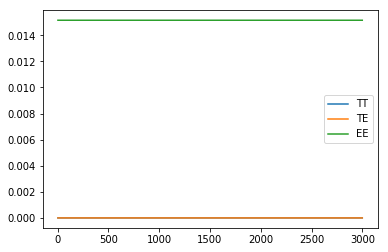

In [175]:
plt.plot(Fobj.ells,Fobj.noiseCls[0,0],label='TT')
plt.plot(Fobj.ells,Fobj.noiseCls[0,1],label='TE')
plt.plot(Fobj.ells,Fobj.noiseCls[1,1],label='EE')
plt.legend()
plt.show()

In [176]:
print Fobj.noiseClsP[0,0]
print Fobj.noiseClsP[0,1]
print Fobj.noiseClsP[1,1]

[8.46159577e-08 8.46159654e-08 8.46159758e-08 ... 1.23888050e-07
 1.23906952e-07 1.23925861e-07]
[0. 0. 0. ... 0. 0. 0.]
[1.69180807e-07 1.69180823e-07 1.69180843e-07 ... 2.47701271e-07
 2.47739064e-07 2.47776870e-07]
